In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import datetime as dt

import sklearn
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [5]:
iris_data = pd.read_csv("Iris.csv")
iris_data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
iris_data.shape

(150, 6)

In [7]:
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [8]:
iris_data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


### Data for Modelling

#### As there is a Object data type in the set we need to remove that column to make it numeric.

In [15]:
iris = datasets.load_iris()
iris_data1 = pd.DataFrame(iris.data, columns = iris.feature_names)
iris_data1.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


#### As you can see the scales of the datapoints are similar so we dont need to scale the data.

#### Before building a model we need to check for the optimal number of clusters that would be suitable for the data. There are two ways of find the optimal clusters
#### 1. Using SSD
#### 2. Using Silhouette Analysis

### Using SSD

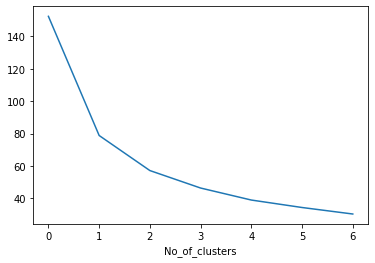

In [17]:
ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(iris_data1)
    ssd.append(kmeans.inertia_)
plt.plot(ssd)
plt.xlabel("No_of_clusters")
plt.show()

#### Here as we can see the label on x axis 1 which is equal to no of cluster = 3 have an elbow in the curve which shows as optimal number of clusters. lets analyse silhouette analysis.

### Using silhouette analysis

In [18]:
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(iris_data1)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(iris_data1, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.681046169211746
For n_clusters=3, the silhouette score is 0.5528190123564091
For n_clusters=4, the silhouette score is 0.4980505049972867
For n_clusters=5, the silhouette score is 0.4887488870931048
For n_clusters=6, the silhouette score is 0.3648340039670018
For n_clusters=7, the silhouette score is 0.3581722472721957
For n_clusters=8, the silhouette score is 0.3470495558673689


#### The difference between the value of silhoutte scores decreases from cluster = 3. Lets make cluster model using 3 clusters.

### K-Means

In [19]:
kmeans = KMeans(n_clusters=3, max_iter=50)
kmeans.fit(iris_data1)

KMeans(max_iter=50, n_clusters=3)

In [20]:
kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

In [22]:
iris_data1["cluster_id"] = kmeans.labels_
iris_data1.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),cluster_id
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


#### Lets plot first two columns to check there clustering.

In [29]:
iris_data1.rename(columns = {"sepal length (cm)" : "sepal_length", "sepal width (cm)" : "sepal_width", "petal length (cm)" : "petal_length", "petal width (cm)" : "petal_width"}, inplace=True)

In [30]:
iris_data1.head()

,sepal_length,sepal_width,petal_length,petal_width,cluster_id
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


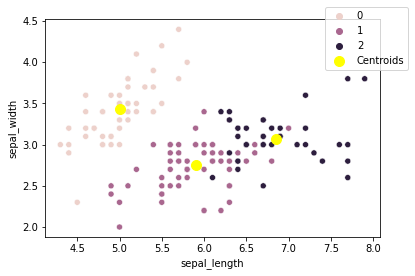

In [38]:
sns.scatterplot(x = iris_data1.sepal_length, y = iris_data1.sepal_width, hue = iris_data1.cluster_id)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'yellow', label = 'Centroids')
plt.legend(bbox_to_anchor=(1.1, 1.08))
plt.show()

#### As you can see the clusters with there centres in it.

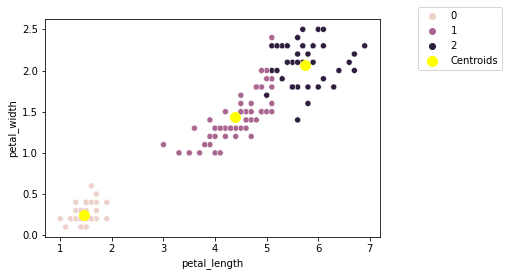

In [40]:
sns.scatterplot(x = iris_data1.petal_length, y = iris_data1.petal_width, hue = iris_data1.cluster_id)
plt.scatter(kmeans.cluster_centers_[:, 2], kmeans.cluster_centers_[:,3], s = 100, c = 'yellow', label = 'Centroids')
plt.legend(bbox_to_anchor=(1.1, 1.08))
plt.show()

#### The above model predicts that three clusters is efficient to build the model. Using K-Means algorithm.